# FMP Stock Fundamentals Exploration 2 : Financial Statements

Welcome to this Jupyter Notebook of the Finsloth.

In this first Notebook of our serie, we are going to explore the first element of FMP Stock Fundamentals which is a Financial Statement.

Our goal is to understand **the meaning and the structure of each data given by FMP, how to transform it for actual use in any trading or investing strategies**.

## About Financial Modeling Prep

Financial Modeling Prep is a stock market API that provides a wide range of data. Data covers stocks, crypto forex and commodities.

You have addition data such as institutional stock ownership, esg score, price target, etc.

There are several plans including a free one.

I am on a start plan for this notebook. Here are the link for the pricing: https://site.financialmodelingprep.com/developer/docs/pricing/

# What are financial statements?

* Financial statements are written records that convey the business activities and the financial performance of an entity.
* The **balance sheet** provides an overview of assets, liabilities, and shareholders' equity as a snapshot in time.
* The **income statement** primarily focuses on a company’s revenues and expenses during a particular period. Once expenses are subtracted from revenues, the statement produces a company's profit figure called net income.
* The **cash flow statement (CFS)** measures how well a company generates cash to pay its debt obligations, fund its operating expenses, and fund investments.
* The statement of changes in equity records how profits are retained within a company for future growth or distributed to external parties.



## Initial Import and API Key

In this section, we are going to perform classic libraries import to perform our data transformation and visualisation.

In [2]:
# We import the basics and some specific to APIs libraries

# Basic Data Manipulation Librairies
import pandas as pd

# requests is another way of sending an API request to FMP
import requests

# json library makes it easier to access JSON format
import json

For privacy reason, I have hidden my key to access the API.

Here is the link to the dashboard where you can find your private key in case you created an account: https://site.financialmodelingprep.com/developer/docs/dashboard

In [37]:
# Because I want to share this file on Github, I made sure that it's not showing the actual key.
key=pd.read_csv('/key.txt', header=None)[0][0]

FMP provides us the right method to extract data from its API according to the coding language you are using.

Here is the function they provided us to extract data with Python.

## Financial Statement: Income Statement

In this section we are going to cover Income Statements.

Income statement provides about the company **its revenue, its expenses and the income**.

More details: https://www.investopedia.com/terms/i/incomestatement.asp

Income statement can be made either **monthly, yearly or by quarter**.

We made our income statement by year.

We chose Apple as an exemple.

### Raw exploration

We'll do a raw exploration of the API before diving into how to structure the link for income statement

In [4]:
# We do our API call from FMP

# First define our url
url='https://financialmodelingprep.com/api/v3/income-statement/AAPL?limit=120&apikey='+key # list of all financial statements

# We do our call using requests and use the json method to get the right format.
# yis stands for yearly income statement
yis=requests.get(url).json()

In [5]:
print(yis[0])

{'date': '2021-09-25', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2021-10-29', 'acceptedDate': '2021-10-28 18:04:28', 'calendarYear': '2021', 'period': 'FY', 'revenue': 365817000000, 'costOfRevenue': 212981000000, 'grossProfit': 152836000000, 'grossProfitRatio': 0.4177935962516778, 'researchAndDevelopmentExpenses': 21914000000, 'generalAndAdministrativeExpenses': 0.0, 'sellingAndMarketingExpenses': 0.0, 'sellingGeneralAndAdministrativeExpenses': 21973000000, 'otherExpenses': 0.0, 'operatingExpenses': 43887000000, 'costAndExpenses': 256868000000, 'interestIncome': 2843000000, 'interestExpense': 2645000000, 'depreciationAndAmortization': 11284000000, 'ebitda': 123136000000, 'ebitdaratio': 0.33660546120054563, 'operatingIncome': 108949000000, 'operatingIncomeRatio': 0.29782377527561593, 'totalOtherIncomeExpensesNet': 258000000, 'incomeBeforeTax': 109207000000, 'incomeBeforeTaxRatio': 0.2985290459437369, 'incomeTaxExpense': 14527000000, 'netIncome': 9

We can see through the json format that the url contains all the information of an income statement and seems to have a structure along date.

Let's transform this into a **Panda Data Frame**.

Panda's dataframe will give us more room for analysis in general.

In [6]:
# We use pandas data frame method to transform our JSON in the DataFrame we want.
yis=pd.DataFrame(yis)

In [7]:
yis.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,0.298529,1.452700e+10,94680000000,0.258818,5.6700,5.6100,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,0.244398,9.680000e+09,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,260174000000,161782000000,...,0.252666,1.048100e+10,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,2018,FY,265595000000,163756000000,...,0.274489,1.337200e+10,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,2017,FY,229234000000,141048000000,...,0.279579,1.573800e+10,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


As we can see, dates are leading the sorting of the income statements.

There are two kind of dates:
- **date** which is the date where the income statement has been made,
- **accepted date** during which the statements has been approved,
- **filing date** during which the document has been filed.

We want to get rid of certain information that are not highly relevant such as symbol (we know which symbol we are talking about) for instance.

Here are the columns that we might want to get rid of:
- **date**, accepted date & filing date: we will only keep the year for modeling,
- **symbol**: we know which symbols we are talking about,
- **CIK**: it's a code that corresponds to the symbol,
- **period**: we know which period it's about.

### Manipulating the Income Statement

We are going to reshape the income statement in order to have fully operational.

We are going to compute two main views:
- A view for **dataviz** to make all kind of nice reports,
- A view for **spreadsheets** and official documents.

In [8]:
# We use drop method(['columns'], axis='columns', inplace=True|False)
yis.drop(['date', 'symbol', 'reportedCurrency','cik','fillingDate', 'acceptedDate', 'period','link','finalLink'],axis='columns',inplace=True)

In [9]:
# Inspecting the heads of columns
yis.head()

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2021,365817000000,212981000000,152836000000,0.417794,2.191400e+10,0.0,0.0,21973000000,0.0,...,258000000,109207000000,0.298529,1.452700e+10,94680000000,0.258818,5.6700,5.6100,16701272000,16864919000
1,2020,274515000000,169559000000,104956000000,0.382332,1.875200e+10,0.0,0.0,19916000000,0.0,...,803000000,67091000000,0.244398,9.680000e+09,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000
2,2019,260174000000,161782000000,98392000000,0.378178,1.621700e+10,0.0,0.0,18245000000,0.0,...,1807000000,65737000000,0.252666,1.048100e+10,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000
3,2018,265595000000,163756000000,101839000000,0.383437,1.423600e+10,0.0,0.0,16705000000,0.0,...,2005000000,72903000000,0.274489,1.337200e+10,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000
4,2017,229234000000,141048000000,88186000000,0.384699,1.158100e+10,0.0,0.0,15261000000,0.0,...,2745000000,64089000000,0.279579,1.573800e+10,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000


In [10]:
# We use the set_index() method to change our index to calendar Year
# Note that we haven't overwritten data yet
yis.set_index('calendarYear').head()

,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
calendarYear,,,,,,,,,,,,,,,,,,,,,
2021,365817000000,212981000000,152836000000,0.417794,2.191400e+10,0.0,0.0,21973000000,0.0,43887000000,...,258000000,109207000000,0.298529,1.452700e+10,94680000000,0.258818,5.6700,5.6100,16701272000,16864919000
2020,274515000000,169559000000,104956000000,0.382332,1.875200e+10,0.0,0.0,19916000000,0.0,38668000000,...,803000000,67091000000,0.244398,9.680000e+09,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000
2019,260174000000,161782000000,98392000000,0.378178,1.621700e+10,0.0,0.0,18245000000,0.0,34462000000,...,1807000000,65737000000,0.252666,1.048100e+10,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000
2018,265595000000,163756000000,101839000000,0.383437,1.423600e+10,0.0,0.0,16705000000,0.0,30941000000,...,2005000000,72903000000,0.274489,1.337200e+10,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000
2017,229234000000,141048000000,88186000000,0.384699,1.158100e+10,0.0,0.0,15261000000,0.0,26842000000,...,2745000000,64089000000,0.279579,1.573800e+10,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000


In [11]:
# For the sake of this exercise, we can see that we haven't rewritten entirely the data.
yis.head()

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2021,365817000000,212981000000,152836000000,0.417794,2.191400e+10,0.0,0.0,21973000000,0.0,...,258000000,109207000000,0.298529,1.452700e+10,94680000000,0.258818,5.6700,5.6100,16701272000,16864919000
1,2020,274515000000,169559000000,104956000000,0.382332,1.875200e+10,0.0,0.0,19916000000,0.0,...,803000000,67091000000,0.244398,9.680000e+09,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000
2,2019,260174000000,161782000000,98392000000,0.378178,1.621700e+10,0.0,0.0,18245000000,0.0,...,1807000000,65737000000,0.252666,1.048100e+10,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000
3,2018,265595000000,163756000000,101839000000,0.383437,1.423600e+10,0.0,0.0,16705000000,0.0,...,2005000000,72903000000,0.274489,1.337200e+10,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000
4,2017,229234000000,141048000000,88186000000,0.384699,1.158100e+10,0.0,0.0,15261000000,0.0,...,2745000000,64089000000,0.279579,1.573800e+10,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000


In [12]:
# Here, we are entirely rewriting the data to make sure we have the right view.
yis.set_index('calendarYear', inplace=True)

In [13]:
# Renaming index as 'category'
yis.index.names = ['Category']

In [14]:
# As you can see, calendarYear is now the official index
yis.head()

,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
Category,,,,,,,,,,,,,,,,,,,,,
2021,365817000000,212981000000,152836000000,0.417794,2.191400e+10,0.0,0.0,21973000000,0.0,43887000000,...,258000000,109207000000,0.298529,1.452700e+10,94680000000,0.258818,5.6700,5.6100,16701272000,16864919000
2020,274515000000,169559000000,104956000000,0.382332,1.875200e+10,0.0,0.0,19916000000,0.0,38668000000,...,803000000,67091000000,0.244398,9.680000e+09,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000
2019,260174000000,161782000000,98392000000,0.378178,1.621700e+10,0.0,0.0,18245000000,0.0,34462000000,...,1807000000,65737000000,0.252666,1.048100e+10,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000
2018,265595000000,163756000000,101839000000,0.383437,1.423600e+10,0.0,0.0,16705000000,0.0,30941000000,...,2005000000,72903000000,0.274489,1.337200e+10,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000
2017,229234000000,141048000000,88186000000,0.384699,1.158100e+10,0.0,0.0,15261000000,0.0,26842000000,...,2745000000,64089000000,0.279579,1.573800e+10,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000


Normally, in finance, people tend to have the Financial Statements oriented in transposed way of what we see right here:
- Vertically all the different steps of the financial statements,
- Horizontally, the dates.

This is practical for human reading.

However, when it comes to ploting time series, it's better to have it organised in a vertical way.

In [15]:
# for the sake of understanding what bankers usually read, we will transpose our dataframe
yist=yis.transpose()

In [16]:
# Renaming the index as "Date"
yist.index.names = ['Date']

In [17]:
# Let's observe what a transposed version of this DataFrame would look like
yist

Category,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
Date,,,,,,,,,,,,,,,,,,,,,
revenue,3.658170e+11,2.745150e+11,2.601740e+11,2.655950e+11,2.292340e+11,2.156390e+11,2.337150e+11,1.827950e+11,1.709100e+11,1.565080e+11,...,9.188748e+09,7.977000e+09,7.086500e+09,6.308800e+09,5.558400e+09,5.284000e+09,4.071400e+09,2.661100e+09,1.901900e+09,1.918300e+09
costOfRevenue,2.129810e+11,1.695590e+11,1.617820e+11,1.637560e+11,1.410480e+11,1.313760e+11,1.400890e+11,1.122580e+11,1.066060e+11,8.784600e+10,...,6.844915e+09,5.082700e+09,3.774200e+09,3.109700e+09,2.403500e+09,2.570000e+09,1.913200e+09,1.225700e+09,8.400000e+08,1.076000e+09
grossProfit,1.528360e+11,1.049560e+11,9.839200e+10,1.018390e+11,8.818600e+10,8.426300e+10,9.362600e+10,7.053700e+10,6.430400e+10,6.866200e+10,...,2.343833e+09,2.894300e+09,3.312300e+09,3.199100e+09,3.154900e+09,2.714000e+09,2.158200e+09,1.435400e+09,1.061900e+09,8.423000e+08
grossProfitRatio,4.177936e-01,3.823325e-01,3.781777e-01,3.834372e-01,3.846986e-01,3.907596e-01,4.005990e-01,3.858804e-01,3.762448e-01,4.387124e-01,...,2.550764e-01,3.628306e-01,4.674099e-01,5.070853e-01,5.675914e-01,5.136260e-01,5.300879e-01,5.394010e-01,5.583364e-01,4.390867e-01
researchAndDevelopmentExpenses,2.191400e+10,1.875200e+10,1.621700e+10,1.423600e+10,1.158100e+10,1.004500e+10,8.067000e+09,6.041000e+09,4.475000e+09,3.381000e+09,...,5.643030e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
generalAndAdministrativeExpenses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sellingAndMarketingExpenses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sellingGeneralAndAdministrativeExpenses,2.197300e+10,1.991600e+10,1.824500e+10,1.670500e+10,1.526100e+10,1.419400e+10,1.432900e+10,1.199300e+10,1.083000e+10,1.004000e+10,...,1.384111e+09,2.617800e+09,2.289400e+09,2.547400e+09,2.240200e+09,1.954900e+09,1.460200e+09,9.934000e+08,7.373000e+08,6.532000e+08
otherExpenses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.661000e+08,2.172000e+08,2.044000e+08,2.027000e+08,1.248000e+08,7.770000e+07,7.050000e+07,5.110000e+07,4.180000e+07


This is a more business oriented way of seeing this DataFrame. In fact, what analysts tend to do is checking year over year (Yoy) the progression of a company.

Here is an example of what an **Income Statement** looks like when introducing the result of a company.

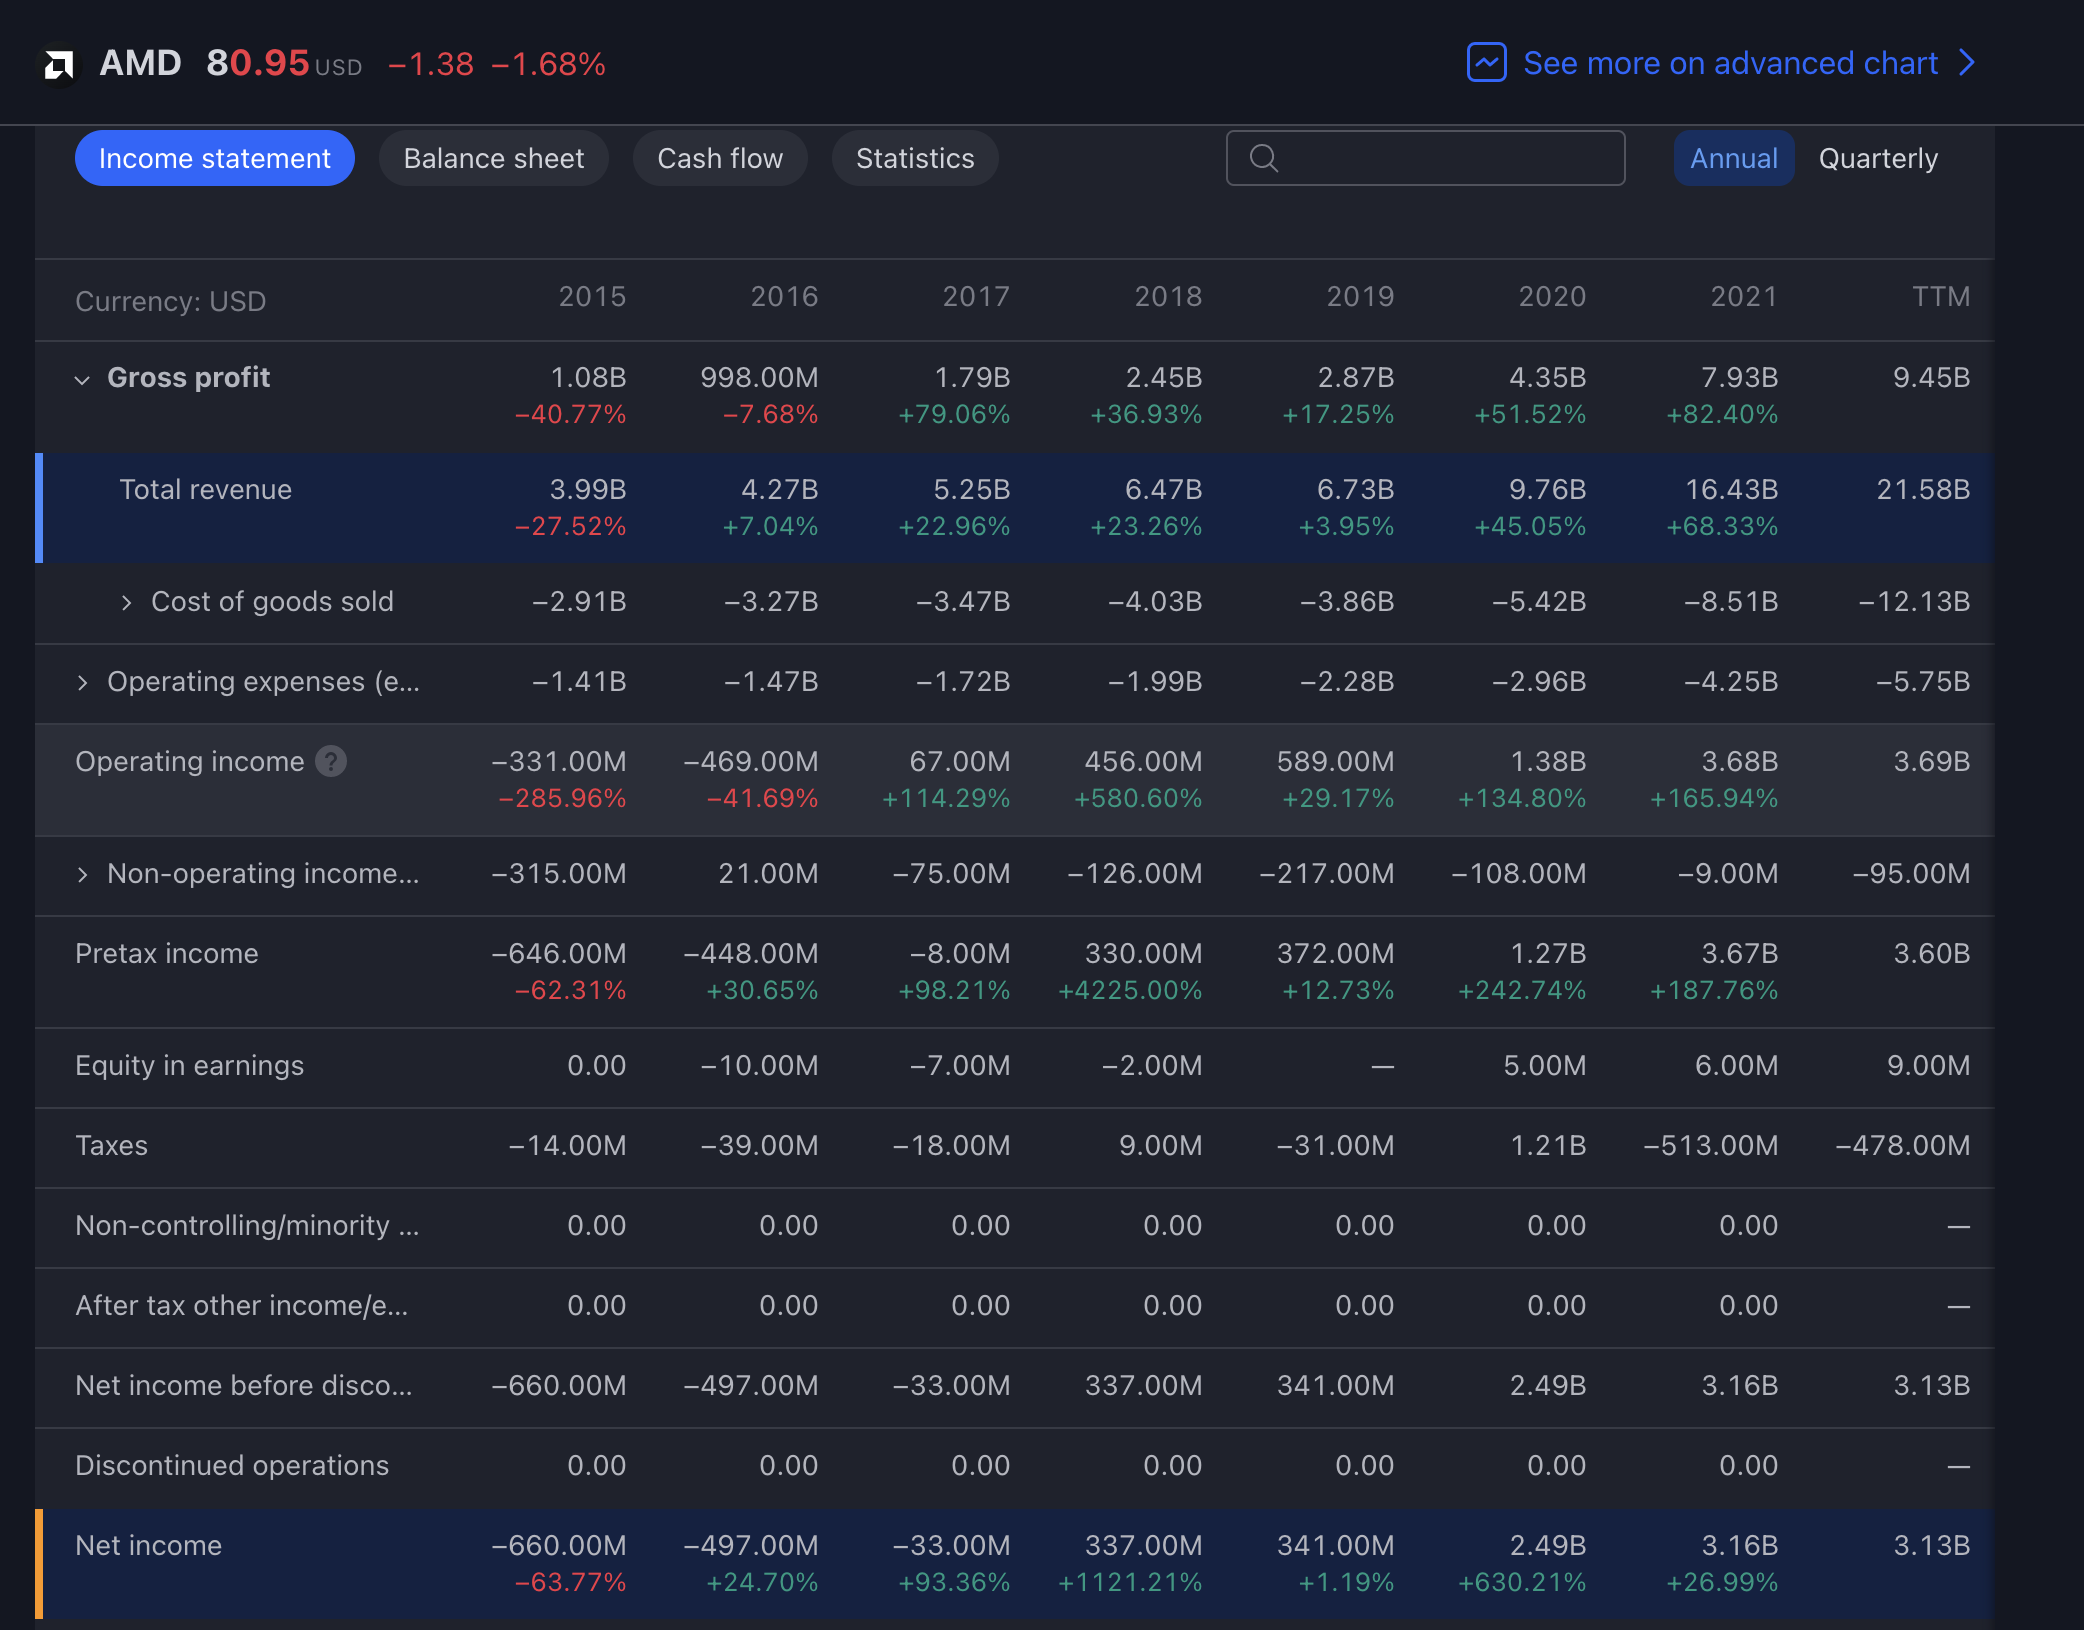

## Financial Statements: balance sheets 

**Balance sheets determine risk**. This financial statement lists everything a company owns and all of its debt. A company will be able to quickly assess whether it has borrowed too much money, whether the assets it owns are not liquid enough, or whether it has enough cash on hand to meet current demands.

If you want to learn more about balance sheets, here is a link: https://www.investopedia.com/terms/b/balancesheet.asp#toc-importance-of-a-balance-sheet

### Key facts about the balance sheets

- A balance sheet is a financial statement that reports a **company's assets, liabilities, and shareholder equity**.
- The balance sheet is **one of the three core financial statements** that are used to evaluate a business.
- It provides a **snapshot of a company's finances (what it owns and owes)** as of the date of publication.
- The balance sheet adheres to an **equation that equates assets with the sum of liabilities and shareholder equity**.
- Fundamental analysts use balance sheets to **calculate financial ratios**.

### Exploration of balance sheets

Juste like previous, we are going to explore what's inside a balance sheet statement.

In [18]:
# We do our API call from FMP on balance sheets
url2='https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?limit=120&apikey='+key

# We do our call using requests and use the json method to get the right format.
# ybs stands for yearly income statement
ybs=requests.get(url2).json()

We know that json returns a list of dictionnary that contains all the key elements.

In finance, most data is organised by date so it's easy to tell that our balance sheets will be organised year by year.

In [19]:
# Let's extract the first element of our json
print(ybs[0])

{'date': '2021-09-25', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2021-10-29', 'acceptedDate': '2021-10-28 18:04:28', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 34940000000, 'shortTermInvestments': 27699000000, 'cashAndShortTermInvestments': 62639000000, 'netReceivables': 51506000000, 'inventory': 6580000000, 'otherCurrentAssets': 14111000000, 'totalCurrentAssets': 134836000000, 'propertyPlantEquipmentNet': 39440000000, 'goodwill': 0.0, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 0.0, 'longTermInvestments': 127877000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 48849000000, 'totalNonCurrentAssets': 216166000000, 'otherAssets': 0.0, 'totalAssets': 351002000000, 'accountPayables': 54763000000, 'shortTermDebt': 15613000000, 'taxPayables': 0.0, 'deferredRevenue': 7612000000, 'otherCurrentLiabilities': 47493000000, 'totalCurrentLiabilities': 125481000000, 'longTermDebt': 109106000000, 'deferredRevenueNonCurrent': 0.

Just like previously, let's turn our json into a DataFrame.

In [20]:
ybs = pd.DataFrame(ybs)

Let's explore what's inside of our balance sheet call.

In [21]:
ybs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     37 non-null     object 
 1   symbol                                   37 non-null     object 
 2   reportedCurrency                         37 non-null     object 
 3   cik                                      37 non-null     object 
 4   fillingDate                              37 non-null     object 
 5   acceptedDate                             37 non-null     object 
 6   calendarYear                             37 non-null     object 
 7   period                                   37 non-null     object 
 8   cashAndCashEquivalents                   37 non-null     int64  
 9   shortTermInvestments                     37 non-null     float64
 10  cashAndShortTermInvestments              37 non-null

As we can see, it's quite complete.

We won't go into details in this one as this notebook is for exploration mainly.

Now, let's observe this Pandas dataframe first rows.

In [22]:
# Let's call the 5 first rows of our pandas dataframe
ybs.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,34940000000,2.769900e+10,...,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,38016000000,5.292700e+10,...,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,48844000000,5.171300e+10,...,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,2018,FY,25913000000,4.038800e+10,...,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,2017,FY,20289000000,5.389200e+10,...,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


Just like previously, let's set index to calendar year

In [23]:
# We change the index to years.
ybs.set_index('calendarYear', inplace=True)
ybs.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
calendarYear,,,,,,,,,,,,,,,,,,,,,
2021,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,FY,34940000000,2.769900e+10,62639000000,...,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2020,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,FY,38016000000,5.292700e+10,90943000000,...,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2019,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,FY,48844000000,5.171300e+10,100557000000,...,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2018,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,FY,25913000000,4.038800e+10,66301000000,...,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2017,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,FY,20289000000,5.389200e+10,74181000000,...,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [24]:
# Let's set the index as year in a definitive way and reorder the years
# ybs.set_index('calendarYear', inplace=True)
ybs.sort_index().tail()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
calendarYear,,,,,,,,,,,,,,,,,,,,,
2017,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,FY,20289000000,5.389200e+10,74181000000,...,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2018,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,FY,25913000000,4.038800e+10,66301000000,...,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2019,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,FY,48844000000,5.171300e+10,100557000000,...,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2020,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,FY,38016000000,5.292700e+10,90943000000,...,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2021,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,FY,34940000000,2.769900e+10,62639000000,...,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


We are going to rename the index from "calendar Year" to "Date" in order to have our data frame more readable.

In [25]:
# We change the index name of our Data Frame
ybs.index.names = ['Date']

# We are inspecting if these changes have been taken into account
ybs.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,...,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
Date,,,,,,,,,,,,,,,,,,,,,
2021,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,FY,34940000000,2.769900e+10,62639000000,...,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2020,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,FY,38016000000,5.292700e+10,90943000000,...,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2019,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,FY,48844000000,5.171300e+10,100557000000,...,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2018,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,FY,25913000000,4.038800e+10,66301000000,...,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2017,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,FY,20289000000,5.389200e+10,74181000000,...,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


Just like previously, let's remove some columns we actually don't need which will include:
- symbol,
- reportedCurrency,
- cik,
- fillingDate,
- acceptedDate,
- period (we already know it's a full year),
- link,
- finalLink.

In [26]:
# We use our drop method from pandas to remove some columns
ybs.drop(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'acceptedDate', 'period', 'link', 'finalLink'], axis='columns', inplace=True)

In [27]:
# Let's inspect our Data Frame
ybs.head()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
Date,,,,,,,,,,,,,,,,,,,,,
2021,34940000000,2.769900e+10,62639000000,51506000000,6580000000,14111000000,134836000000,39440000000,0.000000e+00,0.000000e+00,...,1.630000e+08,0.0,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10
2020,38016000000,5.292700e+10,90943000000,37445000000,4061000000,11264000000,143713000000,36766000000,0.000000e+00,0.000000e+00,...,-4.060000e+08,0.0,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10
2019,48844000000,5.171300e+10,100557000000,45804000000,4106000000,12352000000,162819000000,37378000000,0.000000e+00,0.000000e+00,...,-5.840000e+08,0.0,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10
2018,25913000000,4.038800e+10,66301000000,48995000000,3956000000,12087000000,131339000000,41304000000,0.000000e+00,0.000000e+00,...,-3.454000e+09,0.0,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10
2017,20289000000,5.389200e+10,74181000000,35673000000,4855000000,13936000000,128645000000,33783000000,5.717000e+09,2.298000e+09,...,-1.500000e+08,0.0,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10


### Normal vs. Transposed version of Balance Sheets: when to use each one of them

Both views can be quite useful for the type of analysis you try to perform. However, it's wise to understand which one is mostly adapted.

Here is a good way to separate both views.

Use **Normal** view when:
- computing ratios,
- slicing through data,
- data analysis,
- plotting timeseries of result.

Use **Transposed** view when:
- summing up result,
- show in a more traditional way.

#### Transposed version of yearly balance sheets

We will transpose the balance sheets using the transpose method for dataframe. However, before doing that, we will first slice into our data to get only the last ten years of results.

We could perform that using the head method. But for the sake of this exercise, we'll use **the loc method** that allows to call "visible" elements in our dataframe, instead of counting every single index.

In [28]:
# Slicing from 2021 up to 2011 using the loc function
ybs10 = ybs.loc['2021':'2011',:]

# Inspecting our slice
ybs10

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
Date,,,,,,,,,,,,,,,,,,,,,
2021,34940000000,2.769900e+10,62639000000,51506000000,6580000000,14111000000,134836000000,39440000000,0.000000e+00,0.000000e+00,...,1.630000e+08,0.0,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10
2020,38016000000,5.292700e+10,90943000000,37445000000,4061000000,11264000000,143713000000,36766000000,0.000000e+00,0.000000e+00,...,-4.060000e+08,0.0,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10
2019,48844000000,5.171300e+10,100557000000,45804000000,4106000000,12352000000,162819000000,37378000000,0.000000e+00,0.000000e+00,...,-5.840000e+08,0.0,90488000000,338516000000,0,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10
2018,25913000000,4.038800e+10,66301000000,48995000000,3956000000,12087000000,131339000000,41304000000,0.000000e+00,0.000000e+00,...,-3.454000e+09,0.0,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10
2017,20289000000,5.389200e+10,74181000000,35673000000,4855000000,13936000000,128645000000,33783000000,5.717000e+09,2.298000e+09,...,-1.500000e+08,0.0,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10
2016,20484000000,4.667100e+10,67155000000,29299000000,2132000000,8283000000,106869000000,27010000000,5.414000e+09,3.206000e+09,...,6.340000e+08,0.0,128249000000,321686000000,0,128249000000,321686000000,2.171010e+11,8.703200e+10,6.654800e+10
2015,21120000000,2.048100e+10,41601000000,30343000000,2349000000,15085000000,89378000000,22471000000,5.116000e+09,3.893000e+09,...,-3.450000e+08,0.0,119355000000,290479000000,0,119355000000,290479000000,1.845460e+11,6.446200e+10,4.334200e+10
2014,13844000000,1.123300e+10,25077000000,27219000000,2111000000,14124000000,68531000000,20624000000,4.616000e+09,4.142000e+09,...,1.082000e+09,0.0,111547000000,231839000000,0,111547000000,231839000000,1.413950e+11,3.529500e+10,2.145100e+10
2013,14259000000,2.628700e+10,40546000000,20641000000,1764000000,10335000000,73286000000,16597000000,1.577000e+09,4.179000e+09,...,-4.710000e+08,0.0,123549000000,207000000000,0,123549000000,207000000000,1.325020e+11,1.696000e+10,2.701000e+09


In [29]:
# We'll call it yearly balance sheets transposed or ybst
ybst = ybs10.transpose()

In [30]:
# Using the info method to check up whether the changes have been correctly made
ybst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, cashAndCashEquivalents to netDebt
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2021    44 non-null     float64
 1   2020    44 non-null     float64
 2   2019    44 non-null     float64
 3   2018    44 non-null     float64
 4   2017    44 non-null     float64
 5   2016    44 non-null     float64
 6   2015    44 non-null     float64
 7   2014    44 non-null     float64
 8   2013    44 non-null     float64
 9   2012    44 non-null     float64
 10  2011    44 non-null     float64
dtypes: float64(11)
memory usage: 5.2+ KB


We can attest that the number of rows and columns have remained the same.

### Performing accounting operations: ratios

The power of having financial statements is that we can perform financial ratios that provides key input about the health of the company. This type of analysis is referred as fundamentals as it try to grasp company's performance not on stock market data, but purely on what is happening inside the company.

We will compute the current ratio as an example.

In [31]:
# Let's quickly recall our Balance Sheets
ybs10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2021 to 2011
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cashAndCashEquivalents                   11 non-null     int64  
 1   shortTermInvestments                     11 non-null     float64
 2   cashAndShortTermInvestments              11 non-null     int64  
 3   netReceivables                           11 non-null     int64  
 4   inventory                                11 non-null     int64  
 5   otherCurrentAssets                       11 non-null     int64  
 6   totalCurrentAssets                       11 non-null     int64  
 7   propertyPlantEquipmentNet                11 non-null     int64  
 8   goodwill                                 11 non-null     float64
 9   intangibleAssets                         11 non-null     float64
 10  goodwillAndIntangibleAssets              11 non-null

### Current Ratio

Current ratio helps assess if a company has **enough cash and short term assets to pay the bills in the short term**.

|Current Ratio = Current Assets / Current Liabilities|
|----------------------------------------------------|

A rule of thumb reference for this ratio would be 1.5 or higher to tell if the company has a good current ratio.

A ratio under 1 would signify that the company is at risk of being short of liquidity.

Ratio varies according to business. A higher ratio would also require further investigation.

source: https://www.investopedia.com/terms/c/currentratio.asp

#### Computing the current ratio

We will create a new column to our existing normal (non-transposed) dataframe **ybs** called **"currentRatio"** (we try to respect Financial Model Prep way of writing as much as possible) by **dividing columns "totalCurrentAssets" by "totalCurrentLiabilities"**.

In [32]:
# We apply our formula to add our new column to our dataframe
ybs10['currentRatio'] = ybs10['totalCurrentAssets'] / ybs10['totalCurrentLiabilities']
ybs10['currentRatio']

/var/folders/sn/wq_2w76s333b7xmhtx39fzs80000gn/T/ipykernel_46158/3540243556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ybs10['currentRatio'] = ybs10['totalCurrentAssets'] / ybs10['totalCurrentLiabilities']


Date
2021    1.074553
2020    1.363604
2019    1.540126
2018    1.123843
2017    1.276063
2016    1.352669
2015    1.108771
2014    1.080113
2013    1.678639
2012    1.495849
2011    1.608438
Name: currentRatio, dtype: float64

We want to see how well Apple is performing on current ratio.

Let's first investigate how many times current ratio was inferior to 1.5 in the last 10 years and then how many times it was superior on the same period.

In [33]:
# The method consist of slicing through the column using our 1.5 reference value
below1pt5 = ybs10[ybs10['currentRatio'] < 1.5]

# Let's have a look now at our new dataframe
below1pt5

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalEquity,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,currentRatio
Date,,,,,,,,,,,,,,,,,,,,,
2021,34940000000,2.769900e+10,62639000000,51506000000,6580000000,14111000000,134836000000,39440000000,0.000000e+00,0.000000e+00,...,0.0,63090000000,351002000000,0,63090000000,351002000000,1.555760e+11,1.247190e+11,8.977900e+10,1.074553
2020,38016000000,5.292700e+10,90943000000,37445000000,4061000000,11264000000,143713000000,36766000000,0.000000e+00,0.000000e+00,...,0.0,65339000000,323888000000,0,65339000000,323888000000,1.538140e+11,1.124360e+11,7.442000e+10,1.363604
2018,25913000000,4.038800e+10,66301000000,48995000000,3956000000,12087000000,131339000000,41304000000,0.000000e+00,0.000000e+00,...,0.0,107147000000,365725000000,0,107147000000,365725000000,2.111870e+11,1.144830e+11,8.857000e+10,1.123843
2017,20289000000,5.389200e+10,74181000000,35673000000,4855000000,13936000000,128645000000,33783000000,5.717000e+09,2.298000e+09,...,0.0,134047000000,375319000000,0,134047000000,375319000000,2.486060e+11,1.156800e+11,9.539100e+10,1.276063
2016,20484000000,4.667100e+10,67155000000,29299000000,2132000000,8283000000,106869000000,27010000000,5.414000e+09,3.206000e+09,...,0.0,128249000000,321686000000,0,128249000000,321686000000,2.171010e+11,8.703200e+10,6.654800e+10,1.352669
2015,21120000000,2.048100e+10,41601000000,30343000000,2349000000,15085000000,89378000000,22471000000,5.116000e+09,3.893000e+09,...,0.0,119355000000,290479000000,0,119355000000,290479000000,1.845460e+11,6.446200e+10,4.334200e+10,1.108771
2014,13844000000,1.123300e+10,25077000000,27219000000,2111000000,14124000000,68531000000,20624000000,4.616000e+09,4.142000e+09,...,0.0,111547000000,231839000000,0,111547000000,231839000000,1.413950e+11,3.529500e+10,2.145100e+10,1.080113
2012,10746000000,1.838300e+10,29129000000,18692000000,791000000,9041000000,57653000000,15452000000,1.135000e+09,4.224000e+09,...,0.0,118210000000,176064000000,0,118210000000,176064000000,1.105050e+11,0.000000e+00,-1.074600e+10,1.495849


In [34]:
# Counting how many times in the last year
below1pt5.index.value_counts().sum()

8

Eight out of eleven which is a little below 20% are under 1.5. We won't go further into the the analysis as this is not the goal of this notebook.

## Financial Statement: cashflow report

The cash flow statement (CFS) measures how well a company generates cash to pay its debt obligations, fund its operating expenses, and fund investments.

The CFS allows investors to understand how a company's operations are running, where its money is coming from, and how money is being spent. The CFS also provides insight as to whether a company is on a solid financial footing.

source: https://www.investopedia.com/terms/f/financial-statements.asp#toc-cash-flow-statement

### Extracting cashflow report

In [43]:
# Importing the right url to our notebook
url3 = "https://financialmodelingprep.com/api/v3/cash-flow-statement/AAPL?limit=120&apikey="+key

# We will then establish our call
ycr = requests.get(url3).json()

As usual, we will explore what's in our JSON request by first checking the first element of our list and then by transforming our JSON into a Pandas 

In [44]:
# Let's call the first element in our JSON
ycr[0]

{'date': '2021-09-25',
 'symbol': 'AAPL',
 'reportedCurrency': 'USD',
 'cik': '0000320193',
 'fillingDate': '2021-10-29',
 'acceptedDate': '2021-10-28 18:04:28',
 'calendarYear': '2021',
 'period': 'FY',
 'netIncome': 94680000000,
 'depreciationAndAmortization': 11284000000,
 'deferredIncomeTax': -4774000000,
 'stockBasedCompensation': 7906000000,
 'changeInWorkingCapital': -4911000000,
 'accountsReceivables': -10125000000,
 'inventory': -2642000000,
 'accountsPayables': 12326000000,
 'otherWorkingCapital': 1676000000,
 'otherNonCashItems': -147000000,
 'netCashProvidedByOperatingActivities': 104038000000,
 'investmentsInPropertyPlantAndEquipment': -11085000000,
 'acquisitionsNet': -33000000,
 'purchasesOfInvestments': -109689000000,
 'salesMaturitiesOfInvestments': 106870000000,
 'otherInvestingActivites': -608000000,
 'netCashUsedForInvestingActivites': -14545000000,
 'debtRepayment': -8750000000,
 'commonStockIssued': 1105000000,
 'commonStockRepurchased': -85971000000,
 'dividendsP

We can see that the call actually contains all key info about the cashflow of Apple. Furthermore, the call contains info that may be removed when doing analysis such as date, symbol, cik, etc.

We'll now compute the Pandas DataFrame of our call.

In [46]:
# Calling Pandas dataframe function on our API call
ycr = pd.DataFrame(ycr)

# Inspecting what's inside our dataframe
ycr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   date                                      33 non-null     object 
 1   symbol                                    33 non-null     object 
 2   reportedCurrency                          33 non-null     object 
 3   cik                                       33 non-null     object 
 4   fillingDate                               33 non-null     object 
 5   acceptedDate                              33 non-null     object 
 6   calendarYear                              33 non-null     object 
 7   period                                    33 non-null     object 
 8   netIncome                                 33 non-null     int64  
 9   depreciationAndAmortization               33 non-null     int64  
 10  deferredIncomeTax                       

It appears that we have the data of cashflow report for 33 years of Apple report.

In [47]:
# Inspecting the first five row of our DataFrame
ycr.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
0,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,94680000000,11284000000,...,-93353000000,0.0,-3860000000,3.592900e+10,39789000000,104038000000,-11085000000,92953000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,57411000000,11056000000,...,-86820000000,0.0,-10435000000,3.978900e+10,50224000000,80674000000,-7309000000,73365000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,55256000000,12547000000,...,-90976000000,0.0,24311000000,5.022400e+10,25913000000,69391000000,-10495000000,58896000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2018-09-29,AAPL,USD,0000320193,2018-11-05,2018-11-05 08:01:40,2018,FY,59531000000,10903000000,...,-87876000000,0.0,5624000000,2.591300e+10,20289000000,77434000000,-13313000000,64121000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2017-09-30,AAPL,USD,0000320193,2017-11-03,2017-11-03 08:01:37,2017,FY,48351000000,10157000000,...,-17347000000,0.0,-195000000,2.028900e+10,20484000000,63598000000,-12795000000,50803000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [48]:
# Inspecting the last five row of our DataFrame
ycr.tail()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
28,1993-09-30,AAPL,USD,0000320193,1993-09-30,1993-09-30,1993,FY,86600000,166100000,...,346900000,0.0,346900000,0.0,498600000,-661800000,-213100000,-874900000,,
29,1992-09-30,AAPL,USD,0000320193,1992-09-30,1992-09-30,1992,FY,530400000,217200000,...,-76700000,0.0,-76700000,0.0,604100000,883700000,-194900000,688800000,,
30,1991-09-30,AAPL,USD,0000320193,1991-09-30,1991-09-30,1991,FY,309800000,204400000,...,42500000,0.0,42500000,0.0,374700000,128700000,-218300000,-89600000,,
31,1990-09-30,AAPL,USD,0000320193,1990-09-30,1990-09-30,1990,FY,474900000,202700000,...,-454000000,0.0,-454000000,0.0,438300000,963900000,-224300000,739600000,,
32,1989-09-30,AAPL,USD,0000320193,1989-09-30,1989-09-30,1989,FY,454000000,124800000,...,-38300000,0.0,-38300000,0.0,372400000,507300000,-239000000,268300000,,


In [ ]:
# Let's drop the columns we don't use
ycr.drop(['date','symbol', 'reportedCurrency','cik', 'fillingDate', 'acceptedDate', 'period','link', 'finalLink'], axis='columns', inplace=True)

In [ ]:
# Let's also change the index to calendarYear
ycr.set_index('calendarYear', inplace=True)

In [61]:
# Inspecting dataframe
ycr.head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow
calendarYear,,,,,,,,,,,,,,,,,,,,,
2021,94680000000,11284000000,-4.774000e+09,7.906000e+09,-4911000000,-1.012500e+10,-2642000000,1.232600e+10,1.676000e+09,-147000000.0,...,-1.446700e+10,1.473000e+10,-93353000000,0.0,-3860000000,3.592900e+10,39789000000,104038000000,-11085000000,92953000000
2020,57411000000,11056000000,-2.150000e+08,6.829000e+09,5690000000,6.917000e+09,-127000000,-4.062000e+09,2.081000e+09,-97000000.0,...,-1.408100e+10,1.136800e+10,-86820000000,0.0,-10435000000,3.978900e+10,50224000000,80674000000,-7309000000,73365000000
2019,55256000000,12547000000,-3.400000e+08,6.068000e+09,-3488000000,2.450000e+08,-289000000,-1.923000e+09,-6.250000e+08,-652000000.0,...,-1.411900e+10,-1.936000e+09,-90976000000,0.0,24311000000,5.022400e+10,25913000000,69391000000,-10495000000,58896000000
2018,59531000000,10903000000,-3.259000e+10,5.340000e+09,34694000000,-5.322000e+09,828000000,9.175000e+09,-4.400000e+07,-444000000.0,...,-1.371200e+10,4.405000e+09,-87876000000,0.0,5624000000,2.591300e+10,20289000000,77434000000,-13313000000,64121000000
2017,48351000000,10157000000,5.966000e+09,4.840000e+09,-5550000000,-2.093000e+09,-2723000000,9.618000e+09,-6.260000e+08,-166000000.0,...,-1.276900e+10,3.126700e+10,-17347000000,0.0,-195000000,2.028900e+10,20484000000,63598000000,-12795000000,50803000000


We won't go further in the exploration of data of cashflow as it requires a more in-depth understanding of the topic to bring to life some concrete analysis.

Here is a brief explanation of cashflow report: https://corporatefinanceinstitute.com/resources/knowledge/accounting/statement-of-cash-flows/

# Conclusion

Financial Model Prep provides all the key information on the different financial statements.

Financial statements provide key information company's performance and might highly useful when performing Financial Analysis on business and perform key ratios.

It is useful when providing more input to analyze a stock's price.